In [54]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# データのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
X_train.shape

(60000, 28, 28)

In [57]:
y_train.shape

(60000,)

In [58]:
X_test.shape

(10000, 28, 28)

In [59]:
y_test.shape

(10000,)

In [60]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

畳み込み層では4次元配列を受け取るため、変換する（バッチサイズ×縦×横×チャンネル数）。

In [61]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [62]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [63]:
# モデルの定義
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_25 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
__________

In [64]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [65]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4947 - acc: 0.8489 - val_loss: 0.0594 - val_acc: 0.9798


In [66]:
# 精度の評価
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 7s 652us/step
Test loss: 0.059354886505595644
Test accuracy: 0.9798


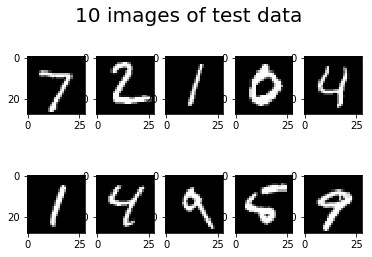

In [67]:
# データの可視化（テストデータの先頭の10枚）
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape((28,28)), 'gray')
plt.suptitle("10 images of test data",fontsize=20)
plt.show()

In [68]:
# 予測（テストデータの先頭の10枚）
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

[7 2 1 0 4 1 4 9 5 9]
